In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker


import pickle
import copy
import numpy as np
import pandas as pd


%load_ext autoreload
%autoreload 2
#%load_ext nb_black

In [2]:
datasets = ['MNIST','Fashion_MNIST','CIFAR']
results_paths = [dataset + '_results.dic' for dataset in datasets]

In [3]:
results = {}
for path in results_paths:
    dataset_results = pickle.load(open(path,'rb'))
    results = dict(results,**dataset_results)

In [4]:
optimizers_names = list(results['MNIST'].keys())

In [5]:
optimizers_names

['Adam', 'LBFGS', 'AdaHessian', 'Apollo']

In [6]:
import pandas as pd

In [7]:
pd.DataFrame(results)

,MNIST,Fashion_MNIST,CIFAR
Adam,"{'training_losses': [1.234895339111487, 0.3058...","{'training_losses': [1.3729619105656943, 0.666...","{'training_losses': [2.191382718086243, 1.9186..."
LBFGS,"{'training_losses': [0.5935688629746437, 0.297...","{'training_losses': [0.8709959169228871, 0.651...","{'training_losses': [1.9140852189064026, 1.681..."
AdaHessian,"{'training_losses': [0.5890345724920432, 0.141...","{'training_losses': [1.3538054386774698, 0.723...","{'training_losses': [2.224062428474426, 1.9255..."
Apollo,"{'training_losses': [2.296611777941386, 1.9149...","{'training_losses': [2.2942224939664206, 1.716...","{'training_losses': [2.303646674156189, 2.3016..."


In [8]:
def get_ylim(results_dic,dataset,data_names,log):
    list_train = []
    list_test = []
    print(dataset)
    for optimizer,data in results_dic[dataset].items():
        list_train.append(data[data_names[0]])
        list_test.append(data[data_names[1]])
    
    list_train = np.array(list_train)
    list_test = np.array(list_test)
    
    ymax = max([np.max(list_train),np.max(list_test)])
    ymin = min([np.min(list_train),np.min(list_test)])
    
    if log:
        y_ticks = np.round(np.logspace(np.log(ymin),np.log(ymax),base = np.exp(1),num=4),2)
    else:
        y_ticks = np.round(np.linspace(ymin,ymax,num=4),2)
    
    return ymin, ymax, y_ticks

In [16]:
def plot(title,data_names,linestyles,datasets,results,log=True, sharex = False,figsize = (10,10)):
    n_rows = len(datasets)
    n_cols = len(data_names)
    
    fig, ax = plt.subplots(n_rows,n_cols,figsize = figsize ,sharex = sharex)
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    optimizers_names = list(results[datasets[-1]].keys())

    for i, dataset in enumerate(datasets):
        ymin, ymax, y_ticks = get_ylim(results,dataset,data_names,log)
        
        for j, optimizer in enumerate(optimizers_names):
            col = colors[j]
            for m, (data_col,ls) in enumerate(zip(data_names,linestyles)):
                data = results[dataset][optimizer][data_col]
                ax[i,m].plot(data,ls = ls,color = col)
                
        for k in reversed(range(len(ax[i,:]))):
            if log:
                ax[i,k].set_yscale('log')

            formatter = matplotlib.ticker.ScalarFormatter()
            formatter.set_powerlimits((-2,1))

            ax[i,k].yaxis.set_major_formatter(formatter)
            ax[i,k].yaxis.set_minor_locator(matplotlib.ticker.NullLocator())
            
            
            ax[i,k].set_ylim([ymin,ymax])
            ax[i,k].set_yticks(y_ticks)
            
            if k == 0:
                ax[i,k].set_yticklabels([])
            ax[i,k].yaxis.tick_right()
            ax[i,k].grid()

            #ax[i,k].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    col_names = ['Train','Test']
    for axis,dataset in zip(ax[0],col_names):
        axis.set_title(dataset,size='x-large')

    for axis, row in zip(ax[:,0], datasets):
        axis.set_ylabel(row, rotation=90, size='large')

    fig.legend(labels = optimizers_names,loc="lower center",bbox_to_anchor=(0.52, 0.05),ncol=4)
    fig.suptitle(title,size='xx-large',y=.95,x=0.517)
    
    return fig

MNIST
Fashion_MNIST
CIFAR


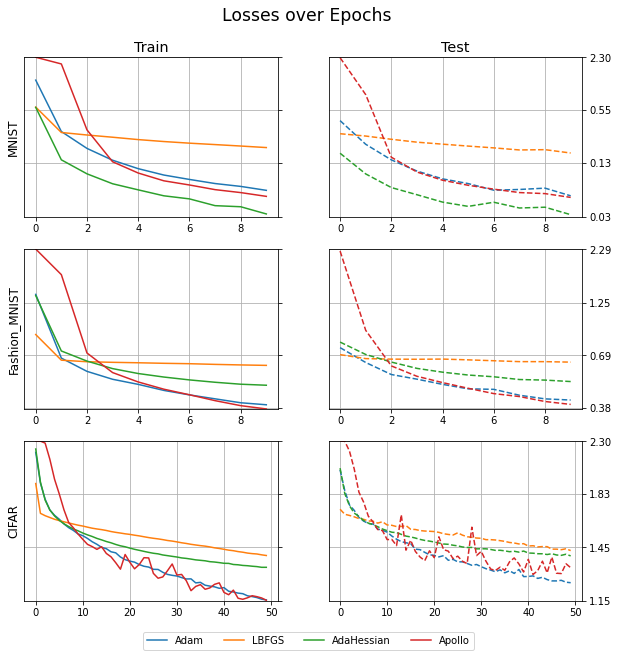

In [21]:
title = "Losses over Epochs"
data_names = ['training_losses','test_losses']
linestyles = ['-','--']
datasets = ['MNIST','Fashion_MNIST','CIFAR'] 

figure = plot(title,data_names,linestyles,datasets,results)
plt.savefig("../results/lossesVsEpochs.png")

<Figure size 432x288 with 0 Axes>

MNIST
Fashion_MNIST
CIFAR


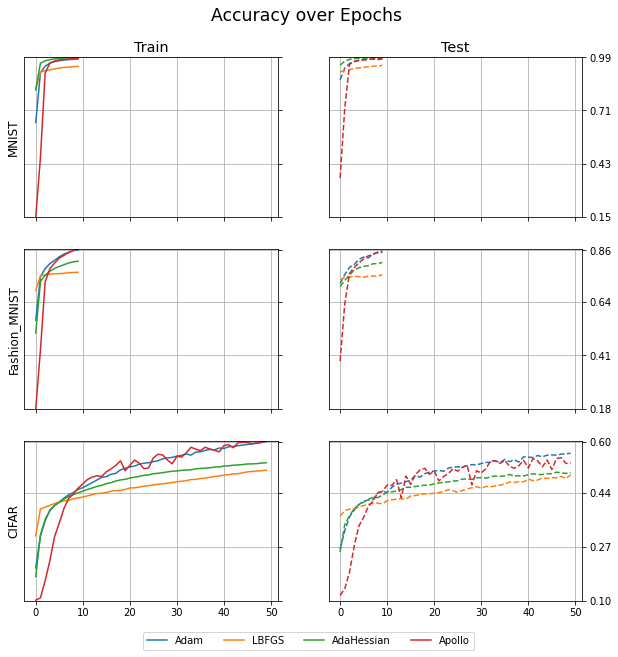

In [11]:
title = "Accuracy over Epochs"
data_names = ['training_accuracies','test_accuracies']
linestyles = ['-','--']
datasets = ['MNIST','Fashion_MNIST','CIFAR'] 

plot(title,data_names,linestyles,datasets,results,log = False)

In [18]:
results

{'MNIST': {'Adam': {'training_losses': [1.234895339111487,
    0.30588686391711234,
    0.19352129995822906,
    0.14033129500846067,
    0.11166171828905741,
    0.09390942193567753,
    0.08334243750820557,
    0.07456568131844203,
    0.06898614652454853,
    0.06199631802737713],
   'test_losses': [0.41117103099823,
    0.21638985499739646,
    0.1417278613895178,
    0.10462397560477257,
    0.08463669419288636,
    0.0744831170886755,
    0.06223339289426803,
    0.0634911149740219,
    0.06578930094838142,
    0.05345389563590288],
   'training_accuracies': [0.6464666666666666,
    0.9090833333333334,
    0.94355,
    0.9597666666666667,
    0.9674666666666667,
    0.9725333333333334,
    0.9760833333333333,
    0.9781333333333333,
    0.9800833333333333,
    0.98215],
   'test_accuracies': [0.8716,
    0.934,
    0.9574,
    0.9689,
    0.9726,
    0.9765,
    0.9802,
    0.9799,
    0.9784,
    0.9816],
   'model': LeNet5(
     (feature_extractor): Sequential(
       (0): Conv

In [ ]:
fig, ax = plt.subplots(3,2,figsize = (10,10),sharex=True)

data_names = ['training_losses','test_losses']
lines = []
for i, dataset in enumerate(datasets):
    ymin, ymax, y_ticks = get_ylim(results,dataset)
    print( ymin, ymax, y_ticks)
    for j, optimizer in enumerate(optimizers_names):
        training_loss = results[dataset][optimizer][data_names[0]]
        testing_loss = results[dataset][optimizer][data_names[1]]
        col = colors[j]
        ax[i,0].plot(training_loss,ls = '-',color = col)
        ax[i,1].plot(testing_loss,ls = '--',color = col)

        
    for k in reversed(range(len(ax[i,:]))):
        ax[i,k].set_yscale('log')
        
        formatter = matplotlib.ticker.ScalarFormatter()
        formatter.set_powerlimits((-2,1))
        
        ax[i,k].yaxis.set_major_formatter(formatter)
        ax[i,k].yaxis.set_minor_locator(matplotlib.ticker.NullLocator())
        
        ax[i,k].set_ylim([ymin,ymax])
        ax[i,k].set_yticks(y_ticks)
        if k == 0:
            ax[i,k].set_yticklabels([])
        ax[i,k].yaxis.tick_right()
        ax[i,k].grid()

        #ax[i,k].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

col_names = ['Train','Test']
for axis,dataset in zip(ax[0],col_names):
    axis.set_title(dataset,size='x-large')

for axis, row in zip(ax[:,0], datasets):
    axis.set_ylabel(row, rotation=90, size='large')
                           
fig.legend(labels = optimizers_names,loc="lower center",bbox_to_anchor=(0.52, 0.05),ncol=4)
fig.suptitle("Losses over epochs",size='xx-large',y=.95,x=0.517)